Model: "model_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_58 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_29 (Flatten)        (None, 2304)              0  

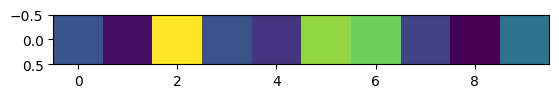

In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Defines input image
input_image = tf.constant(tf.random.normal(shape=(1, 28, 28, 1)))
resized_image = tf.image.resize(input_image, [32, 32])

# Defines input layer
input_layer = tf.keras.Input(shape=(32, 32, 1))

# First layer of Convolution
pool1 = MaxPooling2D(pool_size=(2, 2))(Conv2D(filters=32, kernel_size=3, activation='relu')(input_layer))

# Second Layer of Convolution
pool2 = MaxPooling2D(pool_size=(2, 2))(Conv2D(filters=64, kernel_size=3, activation='relu')(pool1))

# Flattens output of second layer
flatten = Flatten()(pool2)

# Defines fully connected layer
outputs = Dense(units=10, activation='softmax')(flatten)

# Create Keras model
model = tf.keras.models.Model(inputs=input_layer, outputs=outputs)

# Prints the model
model.summary()

# Run model with a random input
output = model.predict(resized_image)

# Changes the array from 2-dimensional to 4-dimensional
output = output[:, np.newaxis, :, np.newaxis]

# Prints output text
print(f"\nOutput shape: {output.shape} \n")


# Shows the image
plt.imshow(output[0, :, :, 0])
plt.show()